In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
class Dense(tf.Module):
    def __init__(self, out_shape, activation=None, name=None):
        super().__init__(name=name)
        self.out_shape = out_shape
        self.is_built = False
        self.activation = activation
    def __call__(self, X, w=None, b=None):
        
        ## Initializing for the firs time
        if not self.is_built:
            self.w = tf.Variable(tf.random.normal([X.shape[-1],self.out_shape]), name='w')
            self.b = tf.Variable(tf.zeros([self.out_shape]), name='b')
            self.is_built = True
        
        ## For predictign with custom weights  
        ## Forward propagation
        if w is None and b is None:
            y = tf.matmul(X, self.w) + self.b
        else:
            y = tf.matmul(X, w) + b
        
        ## Adding activation function
        
        if self.activation=='relu':
            y = tf.nn.relu(y)
        elif self.activation=='sigmoid':
            y = tf.nn.sigmoid(y)
            
        return y
        

In [67]:
class Model(tf.Module):
    def __init__(self, layers, name=None):
        super().__init__(name=name)
        self.layers = layers
    
    def __call__(self, X, w=None, b=None):
        inputs = X
        for i, layer in enumerate(self.layers):
            if w is None and b is None:
                inputs = layer(inputs)
            else:
                inputs = layer(inputs, w[i], b[i])
        return inputs
        

### Simple Dataset

In [68]:
X = tf.constant([[0,0], [0,1], [1,0], [1,1]], dtype='float32')
Y = tf.constant([[0], [1], [1], [0]], dtype='float32')


In [71]:
dense1 = Dense(3, activation ='sigmoid')
dense2 = Dense(1)

model1 = Model([dense1, dense2])

In [72]:
## Trainign Loop

epochs = 2000
# Instantiate an optimizer to train the model.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1)
loss_fn = tf.keras.losses.MeanSquaredError()
for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        preds = model1(X)
        loss_value = loss_fn(Y, preds)
    grads = tape.gradient(loss_value, model1.trainable_variables)
    optimizer.apply_gradients(zip(grads, model1.trainable_variables))

    print(f"Epoch {epoch+1}: \n mean_squared_error: {loss_value}")

    
        

Epoch 1: 
 mean_squared_error: 1.0311150550842285
Epoch 2: 
 mean_squared_error: 0.5170043706893921
Epoch 3: 
 mean_squared_error: 0.3466901481151581
Epoch 4: 
 mean_squared_error: 0.2897663712501526
Epoch 5: 
 mean_squared_error: 0.2705887258052826
Epoch 6: 
 mean_squared_error: 0.26400744915008545
Epoch 7: 
 mean_squared_error: 0.26163437962532043
Epoch 8: 
 mean_squared_error: 0.2606702446937561
Epoch 9: 
 mean_squared_error: 0.2601810097694397
Epoch 10: 
 mean_squared_error: 0.25985443592071533
Epoch 11: 
 mean_squared_error: 0.2595866024494171
Epoch 12: 
 mean_squared_error: 0.2593424320220947
Epoch 13: 
 mean_squared_error: 0.2591102719306946
Epoch 14: 
 mean_squared_error: 0.25888592004776
Epoch 15: 
 mean_squared_error: 0.2586681544780731
Epoch 16: 
 mean_squared_error: 0.25845617055892944
Epoch 17: 
 mean_squared_error: 0.25824975967407227
Epoch 18: 
 mean_squared_error: 0.2580486536026001
Epoch 19: 
 mean_squared_error: 0.257852703332901
Epoch 20: 
 mean_squared_error: 0.2576

Epoch 177: 
 mean_squared_error: 0.2500198483467102
Epoch 178: 
 mean_squared_error: 0.2500137686729431
Epoch 179: 
 mean_squared_error: 0.25000786781311035
Epoch 180: 
 mean_squared_error: 0.25000205636024475
Epoch 181: 
 mean_squared_error: 0.24999627470970154
Epoch 182: 
 mean_squared_error: 0.24999059736728668
Epoch 183: 
 mean_squared_error: 0.24998505413532257
Epoch 184: 
 mean_squared_error: 0.24997952580451965
Epoch 185: 
 mean_squared_error: 0.24997404217720032
Epoch 186: 
 mean_squared_error: 0.24996879696846008
Epoch 187: 
 mean_squared_error: 0.24996355175971985
Epoch 188: 
 mean_squared_error: 0.24995842576026917
Epoch 189: 
 mean_squared_error: 0.2499532699584961
Epoch 190: 
 mean_squared_error: 0.24994826316833496
Epoch 191: 
 mean_squared_error: 0.24994336068630219
Epoch 192: 
 mean_squared_error: 0.24993856251239777
Epoch 193: 
 mean_squared_error: 0.24993379414081573
Epoch 194: 
 mean_squared_error: 0.24992899596691132
Epoch 195: 
 mean_squared_error: 0.24992439150810

Epoch 335: 
 mean_squared_error: 0.2495518922805786
Epoch 336: 
 mean_squared_error: 0.24954982101917267
Epoch 337: 
 mean_squared_error: 0.2495478242635727
Epoch 338: 
 mean_squared_error: 0.24954573810100555
Epoch 339: 
 mean_squared_error: 0.24954384565353394
Epoch 340: 
 mean_squared_error: 0.24954169988632202
Epoch 341: 
 mean_squared_error: 0.24953973293304443
Epoch 342: 
 mean_squared_error: 0.24953770637512207
Epoch 343: 
 mean_squared_error: 0.24953573942184448
Epoch 344: 
 mean_squared_error: 0.2495337426662445
Epoch 345: 
 mean_squared_error: 0.24953168630599976
Epoch 346: 
 mean_squared_error: 0.24952968955039978
Epoch 347: 
 mean_squared_error: 0.24952766299247742
Epoch 348: 
 mean_squared_error: 0.24952566623687744
Epoch 349: 
 mean_squared_error: 0.24952363967895508
Epoch 350: 
 mean_squared_error: 0.2495216280221939
Epoch 351: 
 mean_squared_error: 0.24951955676078796
Epoch 352: 
 mean_squared_error: 0.24951758980751038
Epoch 353: 
 mean_squared_error: 0.249515578150749

Epoch 504: 
 mean_squared_error: 0.24918285012245178
Epoch 505: 
 mean_squared_error: 0.24918043613433838
Epoch 506: 
 mean_squared_error: 0.24917787313461304
Epoch 507: 
 mean_squared_error: 0.2491753250360489
Epoch 508: 
 mean_squared_error: 0.24917291104793549
Epoch 509: 
 mean_squared_error: 0.24917036294937134
Epoch 510: 
 mean_squared_error: 0.24916782975196838
Epoch 511: 
 mean_squared_error: 0.24916526675224304
Epoch 512: 
 mean_squared_error: 0.24916279315948486
Epoch 513: 
 mean_squared_error: 0.24916018545627594
Epoch 514: 
 mean_squared_error: 0.24915769696235657
Epoch 515: 
 mean_squared_error: 0.24915507435798645
Epoch 516: 
 mean_squared_error: 0.24915249645709991
Epoch 517: 
 mean_squared_error: 0.24914997816085815
Epoch 518: 
 mean_squared_error: 0.24914748966693878
Epoch 519: 
 mean_squared_error: 0.24914482235908508
Epoch 520: 
 mean_squared_error: 0.24914228916168213
Epoch 521: 
 mean_squared_error: 0.2491396814584732
Epoch 522: 
 mean_squared_error: 0.2491370886564

Epoch 677: 
 mean_squared_error: 0.24865075945854187
Epoch 678: 
 mean_squared_error: 0.24864692986011505
Epoch 679: 
 mean_squared_error: 0.24864314496517181
Epoch 680: 
 mean_squared_error: 0.2486393004655838
Epoch 681: 
 mean_squared_error: 0.248635396361351
Epoch 682: 
 mean_squared_error: 0.2486315220594406
Epoch 683: 
 mean_squared_error: 0.24862761795520782
Epoch 684: 
 mean_squared_error: 0.2486238181591034
Epoch 685: 
 mean_squared_error: 0.24861983954906464
Epoch 686: 
 mean_squared_error: 0.24861589074134827
Epoch 687: 
 mean_squared_error: 0.24861197173595428
Epoch 688: 
 mean_squared_error: 0.2486080378293991
Epoch 689: 
 mean_squared_error: 0.24860411882400513
Epoch 690: 
 mean_squared_error: 0.24860014021396637
Epoch 691: 
 mean_squared_error: 0.24859619140625
Epoch 692: 
 mean_squared_error: 0.24859222769737244
Epoch 693: 
 mean_squared_error: 0.2485881745815277
Epoch 694: 
 mean_squared_error: 0.24858419597148895
Epoch 695: 
 mean_squared_error: 0.248580202460289
Epoch

Epoch 853: 
 mean_squared_error: 0.24775531888008118
Epoch 854: 
 mean_squared_error: 0.2477484941482544
Epoch 855: 
 mean_squared_error: 0.24774183332920074
Epoch 856: 
 mean_squared_error: 0.247734934091568
Epoch 857: 
 mean_squared_error: 0.24772824347019196
Epoch 858: 
 mean_squared_error: 0.2477213740348816
Epoch 859: 
 mean_squared_error: 0.24771445989608765
Epoch 860: 
 mean_squared_error: 0.2477075755596161
Epoch 861: 
 mean_squared_error: 0.24770066142082214
Epoch 862: 
 mean_squared_error: 0.2476937174797058
Epoch 863: 
 mean_squared_error: 0.24768680334091187
Epoch 864: 
 mean_squared_error: 0.24767981469631195
Epoch 865: 
 mean_squared_error: 0.24767275154590607
Epoch 866: 
 mean_squared_error: 0.247665673494339
Epoch 867: 
 mean_squared_error: 0.2476586103439331
Epoch 868: 
 mean_squared_error: 0.24765151739120483
Epoch 869: 
 mean_squared_error: 0.24764439463615417
Epoch 870: 
 mean_squared_error: 0.2476373016834259
Epoch 871: 
 mean_squared_error: 0.24763011932373047
Epo

Epoch 1027: 
 mean_squared_error: 0.24609145522117615
Epoch 1028: 
 mean_squared_error: 0.24607813358306885
Epoch 1029: 
 mean_squared_error: 0.24606472253799438
Epoch 1030: 
 mean_squared_error: 0.24605116248130798
Epoch 1031: 
 mean_squared_error: 0.24603766202926636
Epoch 1032: 
 mean_squared_error: 0.24602408707141876
Epoch 1033: 
 mean_squared_error: 0.24601048231124878
Epoch 1034: 
 mean_squared_error: 0.24599668383598328
Epoch 1035: 
 mean_squared_error: 0.24598293006420135
Epoch 1036: 
 mean_squared_error: 0.24596913158893585
Epoch 1037: 
 mean_squared_error: 0.24595525860786438
Epoch 1038: 
 mean_squared_error: 0.24594128131866455
Epoch 1039: 
 mean_squared_error: 0.2459273338317871
Epoch 1040: 
 mean_squared_error: 0.2459132820367813
Epoch 1041: 
 mean_squared_error: 0.24589917063713074
Epoch 1042: 
 mean_squared_error: 0.2458849847316742
Epoch 1043: 
 mean_squared_error: 0.2458707094192505
Epoch 1044: 
 mean_squared_error: 0.2458564192056656
Epoch 1045: 
 mean_squared_error:

Epoch 1200: 
 mean_squared_error: 0.24260418117046356
Epoch 1201: 
 mean_squared_error: 0.24257466197013855
Epoch 1202: 
 mean_squared_error: 0.24254503846168518
Epoch 1203: 
 mean_squared_error: 0.2425152063369751
Epoch 1204: 
 mean_squared_error: 0.24248532950878143
Epoch 1205: 
 mean_squared_error: 0.24245518445968628
Epoch 1206: 
 mean_squared_error: 0.24242499470710754
Epoch 1207: 
 mean_squared_error: 0.2423945665359497
Epoch 1208: 
 mean_squared_error: 0.24236413836479187
Epoch 1209: 
 mean_squared_error: 0.24233344197273254
Epoch 1210: 
 mean_squared_error: 0.24230264127254486
Epoch 1211: 
 mean_squared_error: 0.24227164685726166
Epoch 1212: 
 mean_squared_error: 0.24224048852920532
Epoch 1213: 
 mean_squared_error: 0.24220922589302063
Epoch 1214: 
 mean_squared_error: 0.242177814245224
Epoch 1215: 
 mean_squared_error: 0.2421463280916214
Epoch 1216: 
 mean_squared_error: 0.24211454391479492
Epoch 1217: 
 mean_squared_error: 0.2420826554298401
Epoch 1218: 
 mean_squared_error: 

Epoch 1354: 
 mean_squared_error: 0.2358160763978958
Epoch 1355: 
 mean_squared_error: 0.23575280606746674
Epoch 1356: 
 mean_squared_error: 0.23568934202194214
Epoch 1357: 
 mean_squared_error: 0.23562538623809814
Epoch 1358: 
 mean_squared_error: 0.23556119203567505
Epoch 1359: 
 mean_squared_error: 0.23549672961235046
Epoch 1360: 
 mean_squared_error: 0.23543187975883484
Epoch 1361: 
 mean_squared_error: 0.23536676168441772
Epoch 1362: 
 mean_squared_error: 0.23530128598213196
Epoch 1363: 
 mean_squared_error: 0.2352355271577835
Epoch 1364: 
 mean_squared_error: 0.2351694256067276
Epoch 1365: 
 mean_squared_error: 0.23510292172431946
Epoch 1366: 
 mean_squared_error: 0.23503613471984863
Epoch 1367: 
 mean_squared_error: 0.23496904969215393
Epoch 1368: 
 mean_squared_error: 0.2349015325307846
Epoch 1369: 
 mean_squared_error: 0.23483388125896454
Epoch 1370: 
 mean_squared_error: 0.23476570844650269
Epoch 1371: 
 mean_squared_error: 0.23469728231430054
Epoch 1372: 
 mean_squared_error

Epoch 1528: 
 mean_squared_error: 0.21869874000549316
Epoch 1529: 
 mean_squared_error: 0.21855619549751282
Epoch 1530: 
 mean_squared_error: 0.2184130847454071
Epoch 1531: 
 mean_squared_error: 0.21826928853988647
Epoch 1532: 
 mean_squared_error: 0.21812492609024048
Epoch 1533: 
 mean_squared_error: 0.21797987818717957
Epoch 1534: 
 mean_squared_error: 0.21783430874347687
Epoch 1535: 
 mean_squared_error: 0.21768806874752045
Epoch 1536: 
 mean_squared_error: 0.21754127740859985
Epoch 1537: 
 mean_squared_error: 0.21739375591278076
Epoch 1538: 
 mean_squared_error: 0.2172456979751587
Epoch 1539: 
 mean_squared_error: 0.2170969843864441
Epoch 1540: 
 mean_squared_error: 0.21694764494895935
Epoch 1541: 
 mean_squared_error: 0.21679772436618805
Epoch 1542: 
 mean_squared_error: 0.21664711833000183
Epoch 1543: 
 mean_squared_error: 0.21649590134620667
Epoch 1544: 
 mean_squared_error: 0.21634407341480255
Epoch 1545: 
 mean_squared_error: 0.2161916047334671
Epoch 1546: 
 mean_squared_error

Epoch 1703: 
 mean_squared_error: 0.18318432569503784
Epoch 1704: 
 mean_squared_error: 0.182914137840271
Epoch 1705: 
 mean_squared_error: 0.18264317512512207
Epoch 1706: 
 mean_squared_error: 0.18237146735191345
Epoch 1707: 
 mean_squared_error: 0.18209895491600037
Epoch 1708: 
 mean_squared_error: 0.18182554841041565
Epoch 1709: 
 mean_squared_error: 0.18155136704444885
Epoch 1710: 
 mean_squared_error: 0.1812763810157776
Epoch 1711: 
 mean_squared_error: 0.18100063502788544
Epoch 1712: 
 mean_squared_error: 0.18072403967380524
Epoch 1713: 
 mean_squared_error: 0.180446594953537
Epoch 1714: 
 mean_squared_error: 0.18016842007637024
Epoch 1715: 
 mean_squared_error: 0.17988941073417664
Epoch 1716: 
 mean_squared_error: 0.17960967123508453
Epoch 1717: 
 mean_squared_error: 0.1793290376663208
Epoch 1718: 
 mean_squared_error: 0.17904767394065857
Epoch 1719: 
 mean_squared_error: 0.1787654459476471
Epoch 1720: 
 mean_squared_error: 0.17848242819309235
Epoch 1721: 
 mean_squared_error: 0

Epoch 1874: 
 mean_squared_error: 0.12638181447982788
Epoch 1875: 
 mean_squared_error: 0.12600117921829224
Epoch 1876: 
 mean_squared_error: 0.12562021613121033
Epoch 1877: 
 mean_squared_error: 0.12523901462554932
Epoch 1878: 
 mean_squared_error: 0.1248575821518898
Epoch 1879: 
 mean_squared_error: 0.12447580695152283
Epoch 1880: 
 mean_squared_error: 0.12409378588199615
Epoch 1881: 
 mean_squared_error: 0.12371152639389038
Epoch 1882: 
 mean_squared_error: 0.12332897633314133
Epoch 1883: 
 mean_squared_error: 0.12294620275497437
Epoch 1884: 
 mean_squared_error: 0.12256310880184174
Epoch 1885: 
 mean_squared_error: 0.12217988073825836
Epoch 1886: 
 mean_squared_error: 0.12179639935493469
Epoch 1887: 
 mean_squared_error: 0.12141270190477371
Epoch 1888: 
 mean_squared_error: 0.12102875858545303
Epoch 1889: 
 mean_squared_error: 0.12064463645219803
Epoch 1890: 
 mean_squared_error: 0.12026027590036392
Epoch 1891: 
 mean_squared_error: 0.11987572908401489
Epoch 1892: 
 mean_squared_er

In [73]:
model1(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.21441436],
       [0.7191172 ],
       [0.7199412 ],
       [0.33002514]], dtype=float32)>

### Collect the weights

In [74]:
W = []
B = []
deltas_w = []
deltas_b = []

for layer in model1.layers:
    W.append(layer.w)
    B.append(layer.b)
    deltas_w.append(tf.random.normal(shape=layer.w.shape))
    deltas_b.append(tf.random.normal(shape=layer.b.shape))
    


    

In [83]:
limit = 10
step = 0.01
alphas = list(np.arange(-limit,0, step)) + list(np.arange(0, limit, step))
losses = []

for alpha in alphas:
    
    W_m = []
    B_m = []

    for l in range(len(W)):
        w_m = W[l] + alpha * deltas_w[l]
        b_m = B[l] + alpha * deltas_b[l]
        W_m.append(w_m)
        B_m.append(b_m)
        
    predicted = model1(X, W_m, B_m)
    loss_value = loss_fn(Y, predicted)
    losses.append(loss_value.numpy())
    

In [84]:
model1(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.21441436],
       [0.7191172 ],
       [0.7199412 ],
       [0.33002514]], dtype=float32)>

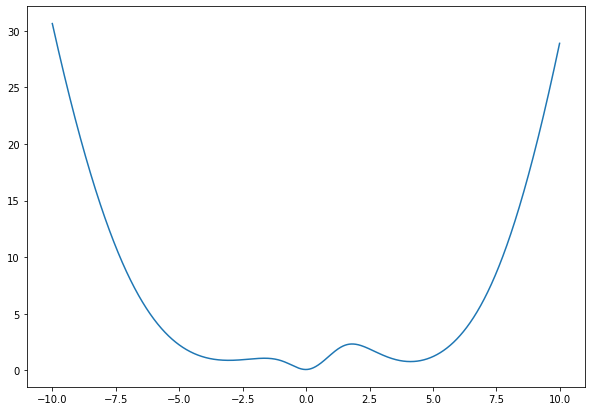

In [85]:
plt.figure(figsize=(10,7))
sns.lineplot(x=alphas, y=losses)
plt.show()

In [87]:
min(losses)

0.07785252

In [173]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [166]:
X,y = ds.make_classification(n_samples=2000, n_classes=2, n_features=2, n_informative=2, n_redundant=0, 
                             n_clusters_per_class=1,class_sep=2,flip_y=0, random_state=41)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=41)

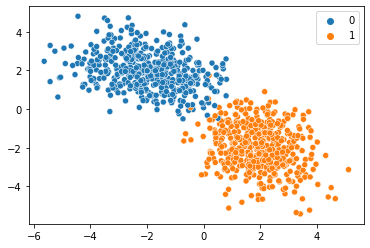

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
plt.show()

In [175]:
import numpy as np
X_train = tf.convert_to_tensor(np.float32(X_train), dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train)

X_test = tf.convert_to_tensor(np.float32(X_test), dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test)

In [201]:
dense1 = Dense(4)
dense2 = Dense(1)
model1 = Model([dense1, dense2],name='model1')

In [159]:
dense1.w

AttributeError: 'Dense' object has no attribute 'w'

In [202]:
epochs = 1000
# Instantiate an optimizer to train the model.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)
loss_fn = tf.keras.losses.BinaryCrossentropy()
for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        preds = model1(X_train)
        loss_value = loss_fn(y_train, preds)
    grads = tape.gradient(loss_value, model1.trainable_variables)
    optimizer.apply_gradients(zip(grads, model1.trainable_variables))
    train_accuracy = accuracy_score(np.where(preds.numpy()>0.5,1,0), y_train.numpy())
    test_preds = model1(X_test)
    test_accuracy = accuracy_score(np.where(test_preds.numpy()>0.5,1,0), y_test)
    print(f"Epoch {epoch+1}: \n Loss value: {loss_value}, train accuracy: {train_accuracy}, test accuracy:{test_accuracy}")

    
        
    
        
    

Epoch 1: 
 Loss value: 1.0052329301834106, train accuracy: 0.249, test accuracy:0.241
Epoch 2: 
 Loss value: 1.0025919675827026, train accuracy: 0.253, test accuracy:0.244
Epoch 3: 
 Loss value: 0.9999666810035706, train accuracy: 0.254, test accuracy:0.246
Epoch 4: 
 Loss value: 0.997357189655304, train accuracy: 0.255, test accuracy:0.247
Epoch 5: 
 Loss value: 0.9947631359100342, train accuracy: 0.256, test accuracy:0.248
Epoch 6: 
 Loss value: 0.9921845197677612, train accuracy: 0.256, test accuracy:0.252
Epoch 7: 
 Loss value: 0.989621102809906, train accuracy: 0.258, test accuracy:0.257
Epoch 8: 
 Loss value: 0.9870727062225342, train accuracy: 0.259, test accuracy:0.257
Epoch 9: 
 Loss value: 0.9845392107963562, train accuracy: 0.26, test accuracy:0.26
Epoch 10: 
 Loss value: 0.982020378112793, train accuracy: 0.261, test accuracy:0.267
Epoch 11: 
 Loss value: 0.9795160889625549, train accuracy: 0.265, test accuracy:0.271
Epoch 12: 
 Loss value: 0.9770262241363525, train accurac

Epoch 103: 
 Loss value: 0.7965568900108337, train accuracy: 0.499, test accuracy:0.503
Epoch 104: 
 Loss value: 0.7949681878089905, train accuracy: 0.499, test accuracy:0.506
Epoch 105: 
 Loss value: 0.7933861613273621, train accuracy: 0.499, test accuracy:0.508
Epoch 106: 
 Loss value: 0.791810929775238, train accuracy: 0.5, test accuracy:0.509
Epoch 107: 
 Loss value: 0.7902425527572632, train accuracy: 0.5, test accuracy:0.51
Epoch 108: 
 Loss value: 0.7886806726455688, train accuracy: 0.501, test accuracy:0.512
Epoch 109: 
 Loss value: 0.7871255874633789, train accuracy: 0.502, test accuracy:0.512
Epoch 110: 
 Loss value: 0.7855771780014038, train accuracy: 0.502, test accuracy:0.513
Epoch 111: 
 Loss value: 0.7840351462364197, train accuracy: 0.503, test accuracy:0.513
Epoch 112: 
 Loss value: 0.7824997305870056, train accuracy: 0.503, test accuracy:0.513
Epoch 113: 
 Loss value: 0.7809706926345825, train accuracy: 0.503, test accuracy:0.514
Epoch 114: 
 Loss value: 0.77944827079

Epoch 200: 
 Loss value: 0.6691210865974426, train accuracy: 0.563, test accuracy:0.562
Epoch 201: 
 Loss value: 0.6680434942245483, train accuracy: 0.564, test accuracy:0.562
Epoch 202: 
 Loss value: 0.6669699549674988, train accuracy: 0.565, test accuracy:0.563
Epoch 203: 
 Loss value: 0.665900468826294, train accuracy: 0.565, test accuracy:0.563
Epoch 204: 
 Loss value: 0.6648349761962891, train accuracy: 0.566, test accuracy:0.563
Epoch 205: 
 Loss value: 0.6637734174728394, train accuracy: 0.566, test accuracy:0.563
Epoch 206: 
 Loss value: 0.6627159714698792, train accuracy: 0.566, test accuracy:0.563
Epoch 207: 
 Loss value: 0.6616622805595398, train accuracy: 0.566, test accuracy:0.563
Epoch 208: 
 Loss value: 0.6606125831604004, train accuracy: 0.566, test accuracy:0.564
Epoch 209: 
 Loss value: 0.6595668792724609, train accuracy: 0.567, test accuracy:0.564
Epoch 210: 
 Loss value: 0.6585250496864319, train accuracy: 0.57, test accuracy:0.565
Epoch 211: 
 Loss value: 0.6574869

Epoch 297: 
 Loss value: 0.5808577537536621, train accuracy: 0.665, test accuracy:0.679
Epoch 298: 
 Loss value: 0.5800944566726685, train accuracy: 0.665, test accuracy:0.68
Epoch 299: 
 Loss value: 0.5793337225914001, train accuracy: 0.667, test accuracy:0.682
Epoch 300: 
 Loss value: 0.5785754323005676, train accuracy: 0.667, test accuracy:0.683
Epoch 301: 
 Loss value: 0.5778197646141052, train accuracy: 0.669, test accuracy:0.683
Epoch 302: 
 Loss value: 0.5770666003227234, train accuracy: 0.67, test accuracy:0.686
Epoch 303: 
 Loss value: 0.5763158798217773, train accuracy: 0.67, test accuracy:0.688
Epoch 304: 
 Loss value: 0.5755676627159119, train accuracy: 0.671, test accuracy:0.688
Epoch 305: 
 Loss value: 0.574821949005127, train accuracy: 0.671, test accuracy:0.689
Epoch 306: 
 Loss value: 0.5740786194801331, train accuracy: 0.672, test accuracy:0.692
Epoch 307: 
 Loss value: 0.5733378529548645, train accuracy: 0.672, test accuracy:0.696
Epoch 308: 
 Loss value: 0.572599411

Epoch 398: 
 Loss value: 0.5148051381111145, train accuracy: 0.877, test accuracy:0.894
Epoch 399: 
 Loss value: 0.5142461657524109, train accuracy: 0.879, test accuracy:0.895
Epoch 400: 
 Loss value: 0.5136888027191162, train accuracy: 0.88, test accuracy:0.898
Epoch 401: 
 Loss value: 0.5131329298019409, train accuracy: 0.88, test accuracy:0.902
Epoch 402: 
 Loss value: 0.5125786662101746, train accuracy: 0.88, test accuracy:0.903
Epoch 403: 
 Loss value: 0.5120260119438171, train accuracy: 0.881, test accuracy:0.906
Epoch 404: 
 Loss value: 0.5114747881889343, train accuracy: 0.882, test accuracy:0.906
Epoch 405: 
 Loss value: 0.5109251141548157, train accuracy: 0.885, test accuracy:0.909
Epoch 406: 
 Loss value: 0.5103769898414612, train accuracy: 0.887, test accuracy:0.909
Epoch 407: 
 Loss value: 0.5098304152488708, train accuracy: 0.888, test accuracy:0.909
Epoch 408: 
 Loss value: 0.5092853903770447, train accuracy: 0.892, test accuracy:0.91
Epoch 409: 
 Loss value: 0.508741736

Epoch 496: 
 Loss value: 0.4664860963821411, train accuracy: 0.965, test accuracy:0.969
Epoch 497: 
 Loss value: 0.46605077385902405, train accuracy: 0.965, test accuracy:0.97
Epoch 498: 
 Loss value: 0.465616375207901, train accuracy: 0.965, test accuracy:0.97
Epoch 499: 
 Loss value: 0.46518296003341675, train accuracy: 0.965, test accuracy:0.971
Epoch 500: 
 Loss value: 0.4647505581378937, train accuracy: 0.966, test accuracy:0.971
Epoch 501: 
 Loss value: 0.4643190801143646, train accuracy: 0.966, test accuracy:0.972
Epoch 502: 
 Loss value: 0.46388861536979675, train accuracy: 0.966, test accuracy:0.972
Epoch 503: 
 Loss value: 0.4634591042995453, train accuracy: 0.968, test accuracy:0.972
Epoch 504: 
 Loss value: 0.46303054690361023, train accuracy: 0.969, test accuracy:0.972
Epoch 505: 
 Loss value: 0.46260303258895874, train accuracy: 0.97, test accuracy:0.972
Epoch 506: 
 Loss value: 0.4621764123439789, train accuracy: 0.971, test accuracy:0.972
Epoch 507: 
 Loss value: 0.4617

Epoch 597: 
 Loss value: 0.4268297553062439, train accuracy: 0.984, test accuracy:0.983
Epoch 598: 
 Loss value: 0.4264744222164154, train accuracy: 0.984, test accuracy:0.983
Epoch 599: 
 Loss value: 0.4261198043823242, train accuracy: 0.984, test accuracy:0.982
Epoch 600: 
 Loss value: 0.4257657527923584, train accuracy: 0.984, test accuracy:0.982
Epoch 601: 
 Loss value: 0.4254123568534851, train accuracy: 0.984, test accuracy:0.982
Epoch 602: 
 Loss value: 0.4250594675540924, train accuracy: 0.984, test accuracy:0.982
Epoch 603: 
 Loss value: 0.424707293510437, train accuracy: 0.984, test accuracy:0.982
Epoch 604: 
 Loss value: 0.42435571551322937, train accuracy: 0.984, test accuracy:0.982
Epoch 605: 
 Loss value: 0.4240046739578247, train accuracy: 0.984, test accuracy:0.982
Epoch 606: 
 Loss value: 0.4236542880535126, train accuracy: 0.984, test accuracy:0.983
Epoch 607: 
 Loss value: 0.4233044683933258, train accuracy: 0.984, test accuracy:0.983
Epoch 608: 
 Loss value: 0.42295

Epoch 697: 
 Loss value: 0.39397677779197693, train accuracy: 0.989, test accuracy:0.987
Epoch 698: 
 Loss value: 0.39367184042930603, train accuracy: 0.989, test accuracy:0.987
Epoch 699: 
 Loss value: 0.3933672606945038, train accuracy: 0.989, test accuracy:0.987
Epoch 700: 
 Loss value: 0.39306312799453735, train accuracy: 0.989, test accuracy:0.987
Epoch 701: 
 Loss value: 0.39275941252708435, train accuracy: 0.989, test accuracy:0.987
Epoch 702: 
 Loss value: 0.3924560844898224, train accuracy: 0.989, test accuracy:0.987
Epoch 703: 
 Loss value: 0.39215314388275146, train accuracy: 0.989, test accuracy:0.987
Epoch 704: 
 Loss value: 0.3918505907058716, train accuracy: 0.989, test accuracy:0.987
Epoch 705: 
 Loss value: 0.39154839515686035, train accuracy: 0.989, test accuracy:0.987
Epoch 706: 
 Loss value: 0.39124658703804016, train accuracy: 0.989, test accuracy:0.987
Epoch 707: 
 Loss value: 0.3909452557563782, train accuracy: 0.989, test accuracy:0.987
Epoch 708: 
 Loss value: 

Epoch 799: 
 Loss value: 0.36468440294265747, train accuracy: 0.992, test accuracy:0.991
Epoch 800: 
 Loss value: 0.3644130825996399, train accuracy: 0.992, test accuracy:0.991
Epoch 801: 
 Loss value: 0.3641420006752014, train accuracy: 0.992, test accuracy:0.991
Epoch 802: 
 Loss value: 0.3638712167739868, train accuracy: 0.992, test accuracy:0.991
Epoch 803: 
 Loss value: 0.3636006712913513, train accuracy: 0.992, test accuracy:0.99
Epoch 804: 
 Loss value: 0.3633304536342621, train accuracy: 0.992, test accuracy:0.99
Epoch 805: 
 Loss value: 0.3630604147911072, train accuracy: 0.992, test accuracy:0.99
Epoch 806: 
 Loss value: 0.36279070377349854, train accuracy: 0.992, test accuracy:0.99
Epoch 807: 
 Loss value: 0.3625212013721466, train accuracy: 0.992, test accuracy:0.99
Epoch 808: 
 Loss value: 0.36225199699401855, train accuracy: 0.992, test accuracy:0.99
Epoch 809: 
 Loss value: 0.3619830310344696, train accuracy: 0.992, test accuracy:0.99
Epoch 810: 
 Loss value: 0.361714363

Epoch 898: 
 Loss value: 0.33899882435798645, train accuracy: 0.993, test accuracy:0.992
Epoch 899: 
 Loss value: 0.33875033259391785, train accuracy: 0.993, test accuracy:0.992
Epoch 900: 
 Loss value: 0.3385021388530731, train accuracy: 0.993, test accuracy:0.992
Epoch 901: 
 Loss value: 0.33825403451919556, train accuracy: 0.993, test accuracy:0.992
Epoch 902: 
 Loss value: 0.3380061388015747, train accuracy: 0.993, test accuracy:0.992
Epoch 903: 
 Loss value: 0.33775851130485535, train accuracy: 0.993, test accuracy:0.992
Epoch 904: 
 Loss value: 0.33751100301742554, train accuracy: 0.993, test accuracy:0.992
Epoch 905: 
 Loss value: 0.3372637629508972, train accuracy: 0.993, test accuracy:0.992
Epoch 906: 
 Loss value: 0.3370167016983032, train accuracy: 0.993, test accuracy:0.992
Epoch 907: 
 Loss value: 0.33676981925964355, train accuracy: 0.993, test accuracy:0.992
Epoch 908: 
 Loss value: 0.3365231454372406, train accuracy: 0.993, test accuracy:0.992
Epoch 909: 
 Loss value: 0

Epoch 999: 
 Loss value: 0.3148527443408966, train accuracy: 0.993, test accuracy:0.992
Epoch 1000: 
 Loss value: 0.3146227300167084, train accuracy: 0.993, test accuracy:0.992


In [246]:
W = []
B = []
deltas_w = []
deltas_b = []

for layer in model1.layers:
    W.append(layer.w)
    B.append(layer.b)
    deltas_w.append(tf.random.normal(shape=layer.w.shape))
    deltas_b.append(tf.random.normal(shape=layer.b.shape))
    


    

In [287]:
limit = 500
step = 0.1
alphas = list(np.arange(-limit,0, step)) + list(np.arange(0, limit, step))
losses = []

for alpha in alphas:
    
    W_m = []
    B_m = []

    for l in range(len(W)):
        w_m = W[l] + alpha * deltas_w[l]
        b_m = B[l] + alpha * deltas_b[l]
        W_m.append(w_m)
        B_m.append(b_m)
        
    predicted = model1(X_train, W_m, B_m)
    loss_value = loss_fn(y_train, predicted)
    losses.append(loss_value.numpy())
    

In [288]:
len(losses)

10000

In [289]:
len(alphas)

10000

<AxesSubplot: >

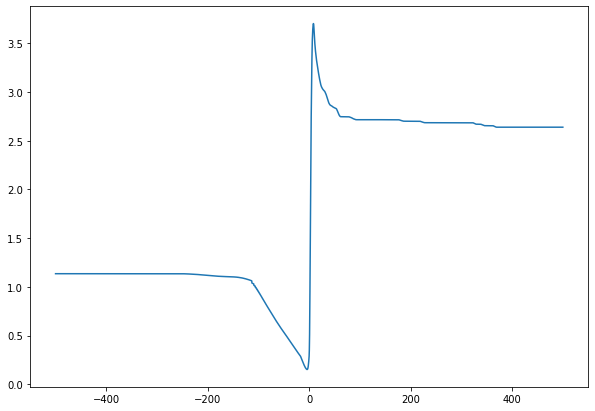

In [292]:
plt.figure(figsize=(10,7))
sns.lineplot(x=alphas, y=losses)

In [260]:
predicted = model1(X_train, W_m, B_m)
loss_value = loss_fn(y_train, predicted)
loss_value

<tf.Tensor: shape=(), dtype=float32, numpy=0.33080345>

In [261]:
predicted = model1(X_train, W, B)
loss_value = loss_fn(y_train, predicted)
loss_value

<tf.Tensor: shape=(), dtype=float32, numpy=0.3143929>

In [259]:
loss_value

<tf.Tensor: shape=(), dtype=float32, numpy=0.33080345>

In [269]:
list(np.arange(-10,0,0.01)) + list(np.arange(0,10, 0.01))

[-10.0,
 -9.99,
 -9.98,
 -9.97,
 -9.96,
 -9.950000000000001,
 -9.940000000000001,
 -9.930000000000001,
 -9.920000000000002,
 -9.910000000000002,
 -9.900000000000002,
 -9.890000000000002,
 -9.880000000000003,
 -9.870000000000003,
 -9.860000000000003,
 -9.850000000000003,
 -9.840000000000003,
 -9.830000000000004,
 -9.820000000000004,
 -9.810000000000004,
 -9.800000000000004,
 -9.790000000000004,
 -9.780000000000005,
 -9.770000000000005,
 -9.760000000000005,
 -9.750000000000005,
 -9.740000000000006,
 -9.730000000000006,
 -9.720000000000006,
 -9.710000000000006,
 -9.700000000000006,
 -9.690000000000007,
 -9.680000000000007,
 -9.670000000000007,
 -9.660000000000007,
 -9.650000000000007,
 -9.640000000000008,
 -9.630000000000008,
 -9.620000000000008,
 -9.610000000000008,
 -9.600000000000009,
 -9.590000000000009,
 -9.580000000000009,
 -9.57000000000001,
 -9.56000000000001,
 -9.55000000000001,
 -9.54000000000001,
 -9.53000000000001,
 -9.52000000000001,
 -9.51000000000001,
 -9.50000000000001,
 -

In [249]:
W_m[0]

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.45336023, -0.9794788 ,  0.64927137, -0.87026834],
       [ 0.12372956,  0.8818089 ,  2.1138792 , -0.79620713]],
      dtype=float32)>

In [250]:
deltas_w[0]

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.34056675,  0.66649157, -1.677834  ,  0.29489797],
       [-0.1447164 ,  0.05614753, -0.79268354, -0.20606565]],
      dtype=float32)>

In [253]:
B[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.04010563, -0.06534716,  0.02347064, -0.06697482], dtype=float32)>

In [254]:
B_m[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.08302011,  0.01551136,  0.25632986, -0.00209872], dtype=float32)>

In [255]:
deltas_b[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.4291447 , 0.80858517, 2.328592  , 0.64876103], dtype=float32)>

In [208]:
w1 = dense1.w

In [205]:
dense1.b

<tf.Variable 'b:0' shape=(4,) dtype=float32, numpy=array([ 0.04010563, -0.06534716,  0.02347064, -0.06697482], dtype=float32)>

In [209]:
b1 = tf.expand_dims(dense1.b, axis=0)

In [213]:
theta1 = tf.concat([b1, w1], axis=0)

In [214]:
theta1

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.04010563, -0.06534716,  0.02347064, -0.06697482],
       [ 0.41930357, -1.0461279 ,  0.81705475, -0.89975816],
       [ 0.1382012 ,  0.8761941 ,  2.1931477 , -0.77560055]],
      dtype=float32)>

In [215]:
w2 = dense2.w

In [216]:
b2 = dense2.b

In [221]:
theta2 = tf.concat([tf.expand_dims(b2, axis=0), w2],axis=0)

In [222]:
theta2

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 0.7815066 ],
       [ 0.3895463 ],
       [-2.1350412 ],
       [-0.14336525],
       [-0.19272782]], dtype=float32)>

In [224]:
tf.concat([tf.expand_dims(theta1, axis=0), tf.expand_dims(theta2, axis=0)],axis=0)

InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:GPU:0}} ConcatOp : Dimension 1 in both shapes must be equal: shape[0] = [1,3,4] vs. shape[1] = [1,5,1] [Op:ConcatV2] name: concat

In [185]:
accuracy_score(preds,y_train)

0.031

In [186]:
preds

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    